# STEP 1 : Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import missingno as msno 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint 

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier

# STEP 2 : Importing training dataset

In [3]:
# Reading the dataset
ckd_df = pd.read_csv('kidney_disease.csv')

In [4]:
#check the columns
ckd_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
##Rename the columns to have meaningful names
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

ckd_df.rename(columns=col_dict, inplace=True)

In [6]:
#Check the column names again
ckd_df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

# STEP 3 : Exploratory Data Analysis


In [7]:
#Check the shape
print(ckd_df.shape)

(400, 26)


Inference - there are 26 features and 400 rows. Small dataset for training.

In [8]:
# Check the data first
ckd_df.head(5)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# Observing the summarized information of data
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

Inference - most of the features are float. The object features need verified categorical values

In [10]:
#Check the number of NULL values in the train Dataset
print('Null values in Train Data: \n', ckd_df.isnull().sum())

Null values in Train Data: 
 id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


Inference - There are missing values for rbc, wbc. Given the small size of train dataset, there is imputation required.

In [11]:
#Check the target value counts
print('Total Count of the Prediction Output Column Classification values: \n', ckd_df['classification'].value_counts())

Total Count of the Prediction Output Column Classification values: 
 ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64


Inference - Distribution is balanced and good. Target values need no correction.

In [12]:
for c in ckd_df.columns:
    print(c)
    print(c,ckd_df[c].unique())

id
id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

Inference - There are incorrect values for diabetes_mellitus, coronary_artery_disease and white_blood_cell_count which need to be corrected.



Inference - Values look good now except for missing values "\t?" and NaN. These will be treated in imputation

In [13]:
#Replace incorrect values
ckd_df['diabetes_mellitus'] =ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')

In [14]:
ckd_df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [15]:
ckd_df["classification"]=ckd_df["classification"].replace("ckd\t", "ckd")

In [16]:
# Looking at the statistial distribution of the data including categorical variables
ckd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,400,NaN,NaN,NaN,199.5,115.614,0,99.75,199.5,299.25,399
age,391,NaN,NaN,NaN,51.4834,17.1697,2,42,55,64.5,90
blood_pressure,388,NaN,NaN,NaN,76.4691,13.6836,50,70,80,80,180
specific_gravity,353,NaN,NaN,NaN,1.01741,0.00571662,1.005,1.01,1.02,1.02,1.025
albumin,354,NaN,NaN,NaN,1.01695,1.35268,0,0,0,2,5
sugar,351,NaN,NaN,NaN,0.450142,1.09919,0,0,0,0,5
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inferences:

1. All features, including categorical are listed.
2. The count value varies from 187 to 280. This means there are few features with missing values.
3. The feature **id** is a running number and seems to be an unique identifier for each row. So, it is not an influencing feature.
4. **age** is between 2 and 90. It is normally distributed.
5. **blood_pressure** , **sodium** and **hemoglobin** are normally distributed.
6. **blood_glucose_random** and **potassium** are right skewed
7. **blood_urea** and **serum_creatinine** are left skewed.
8. Categorical target value is well balanced.



# STEP 4 : Distribution of all features


If target variable's distribution is too skewed then the predictive modeling will not be possible. Bell curve is desirable but slightly positive skew or negative skew is also fine. To make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

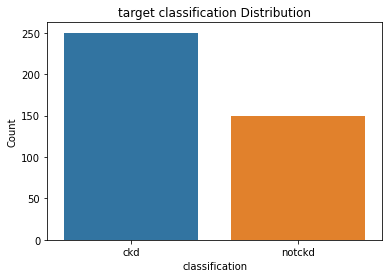

In [17]:
sns.countplot(x='classification',data=ckd_df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target classification Distribution")
plt.show()

Inference - no imbalance in the target feature

In [18]:
##Percent of target data
print("Percent of distribution below:")
ckd_df["classification"].value_counts()/len(ckd_df)*100

Percent of distribution below:


ckd       62.5
notckd    37.5
Name: classification, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb4b337820>,
      dtype=object)

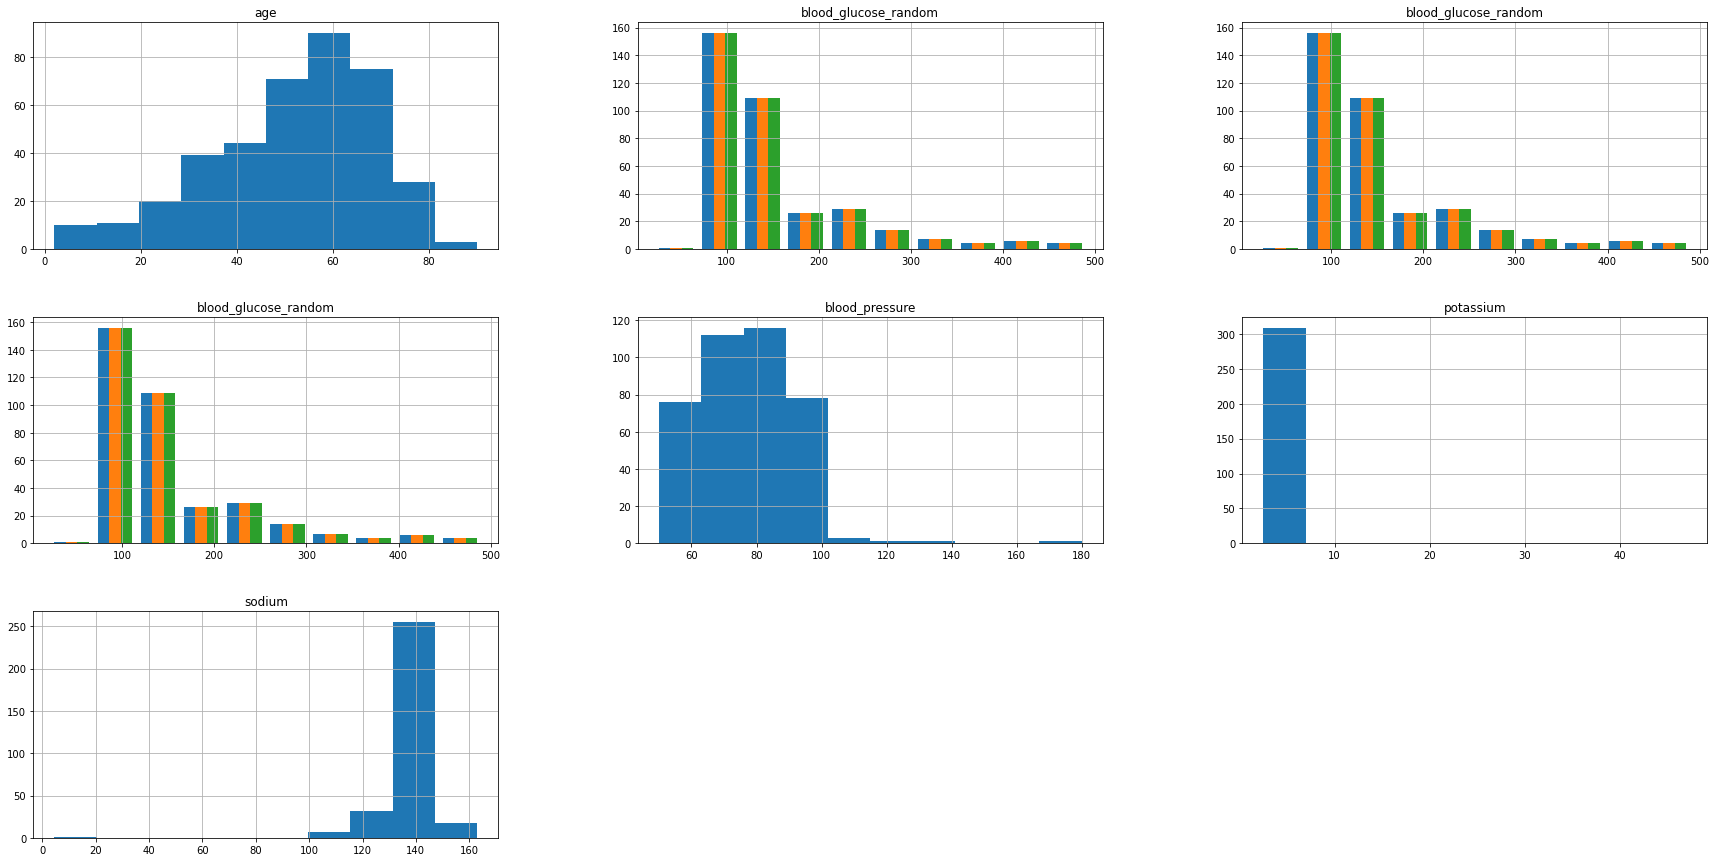

In [19]:
#histograms for all continous variables
ckd_df.hist(['age','blood_pressure', 'blood_glucose_random', 'blood_glucose_random', 
         'blood_glucose_random', 'sodium', 'potassium',  
         'packed_cell_volume', 'packed_cell_volume', 'red_blood_cell_count'], figsize=(30,15))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


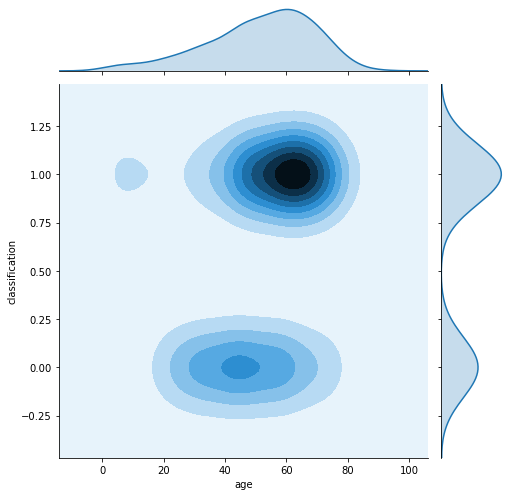

In [20]:
#Check distribution between age and ckd presence
# KDE is used to study PDF of a continuous RV
ckd_df["classification"] = [1 if i == "ckd" else 0 for i in ckd_df["classification"]]
sns.jointplot(ckd_df.age, ckd_df.classification, kind="kde", size=7)

Inferences 
1. nockd - concentrated more around age=40
2. ckd - concentrated more around age = 65

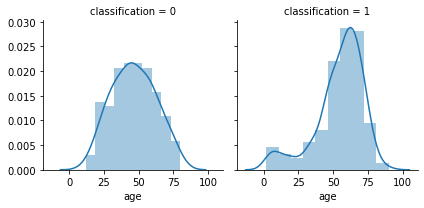

In [21]:
# Check distribution of age for each target class
g = sns.FacetGrid(ckd_df,col="classification")
g.map(sns.distplot,"age", bins=10)
plt.show()

Inferences
1. For class nockd, the data is normally distributed
2. For class ckd, the data is right skewed. There are larger number of values distributed on the right side of the plot. 

# STEP 5 : Check correlation between features

In [22]:
corr_df = ckd_df.corr()

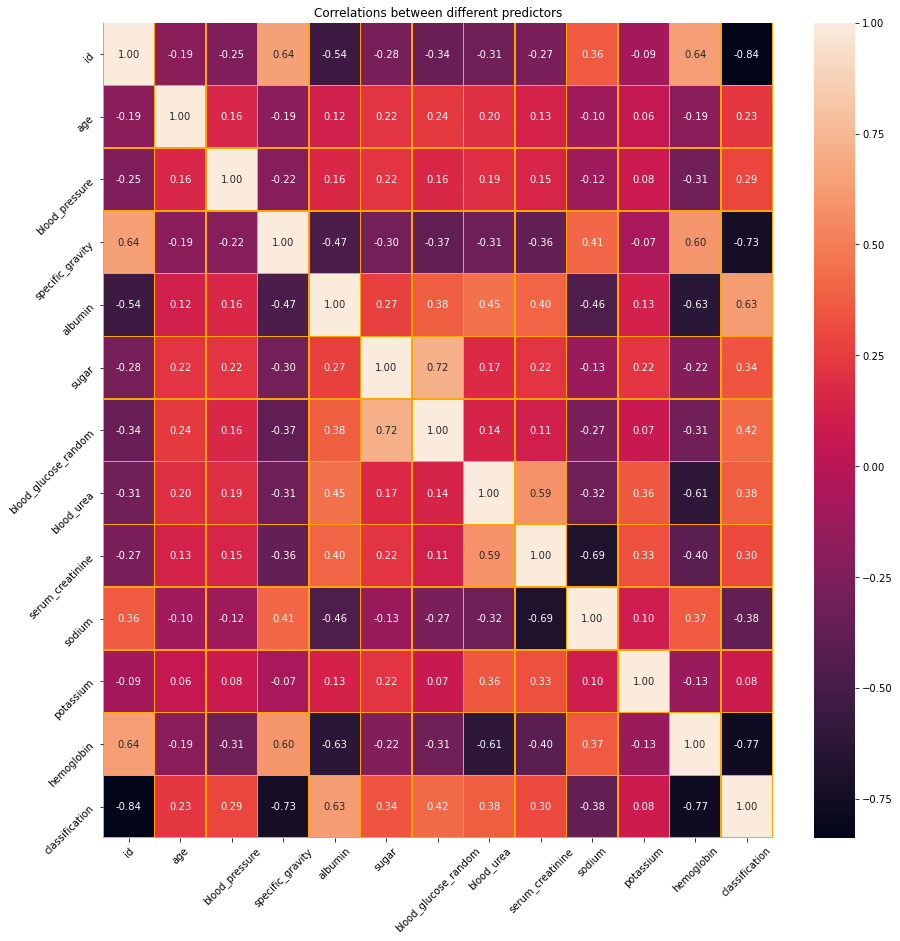

In [23]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

Inferences
1. Any correlation coefficients close to +1 and -1 imply the features are highly correlated.
2. hemo and pcv have correlation coefficient = 0.9. Highly correlated.
3. Any correlationclose to 0 with target can be removed. Here **potassium** can be removed from the features.

# STEP 6 : Data preprocessing

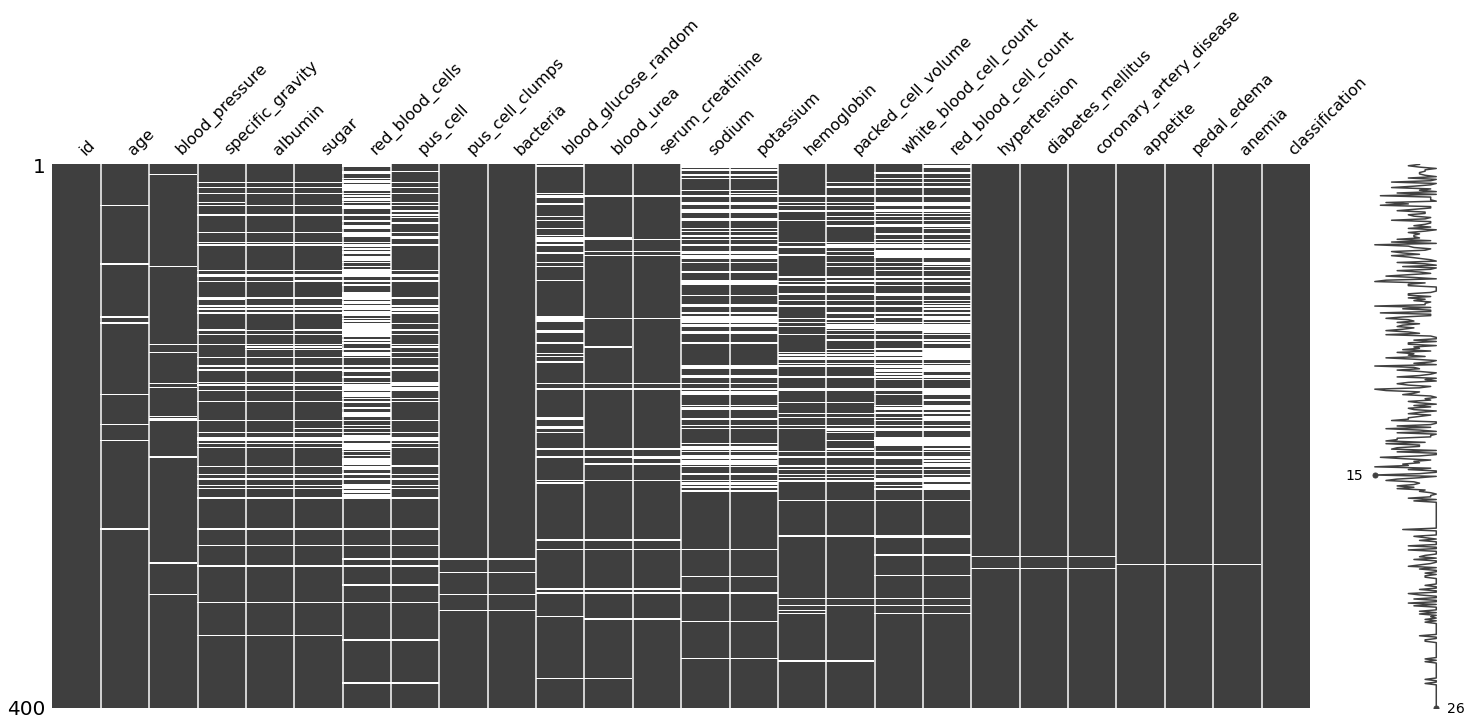

In [24]:
##Find missing values and impute them
# Visualize missing values as a matrix 
msno.matrix(ckd_df) 

Inference - Many columns have missing values. Needs to be fixed

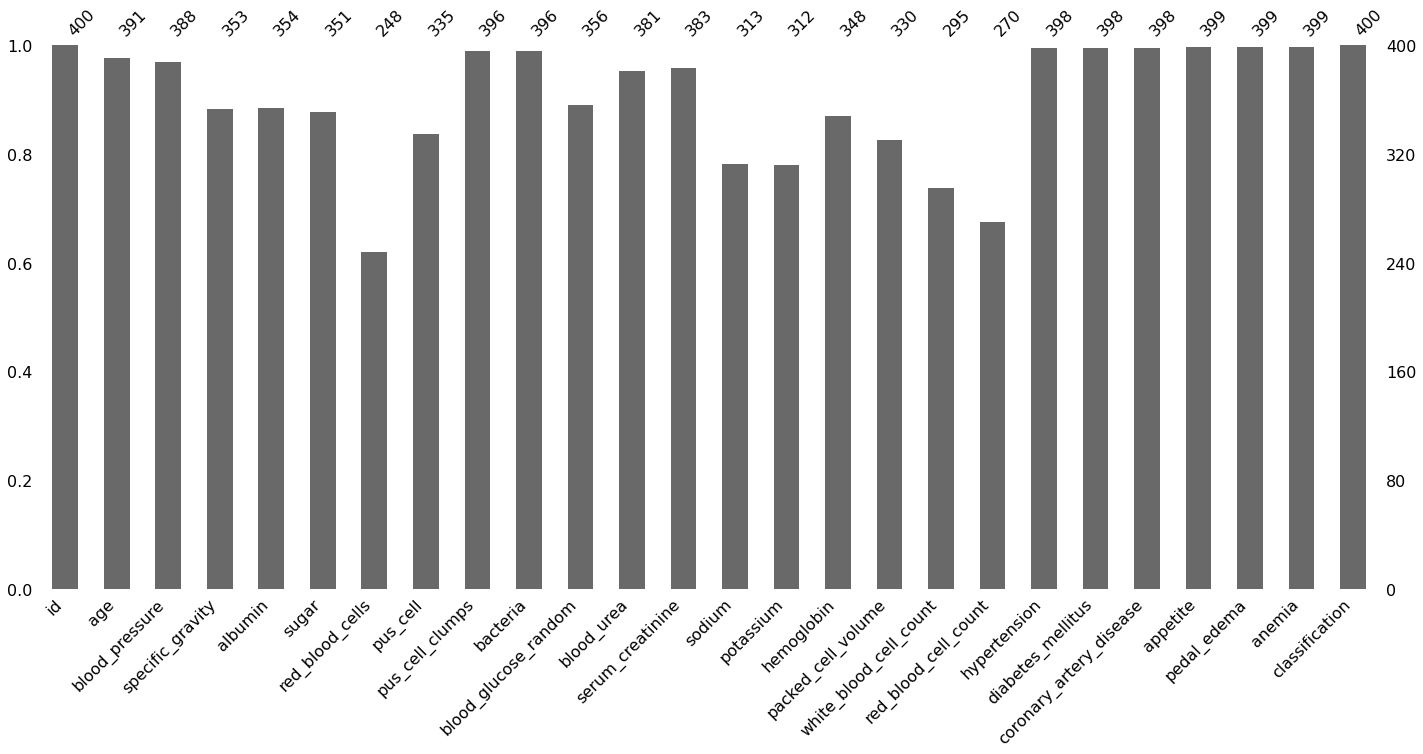

In [25]:
## Visualize the missing values in a histogram
msno.bar(ckd_df)

In [26]:
##Check if the values are good
for c in ckd_df.columns:
    print(c,ckd_df[c].unique())

id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

Inference - There are \t? values, which need to be replaced

In [27]:
ckd_df["white_blood_cell_count"]=ckd_df["white_blood_cell_count"].replace("\t?", np.nan)
ckd_df["red_blood_cell_count"]=ckd_df["red_blood_cell_count"].replace("\t?", np.nan)
ckd_df['diabetes_mellitus'] = ckd_df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
ckd_df['coronary_artery_disease'] = ckd_df['coronary_artery_disease'].replace(to_replace='\tno',value='no')
ckd_df['white_blood_cell_count'] = ckd_df['white_blood_cell_count'].replace(to_replace='\t8400',value='8400')
ckd_df["packed_cell_volume"]= ckd_df["packed_cell_volume"].replace("\t?", np.nan)

In [28]:
##Re-check if the values are good
for c in ckd_df.columns:
    print(c,ckd_df[c].unique())

id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245

In [29]:
for string_column in ["red_blood_cells","pus_cell","pus_cell_clumps","bacteria","hypertension",
                      "diabetes_mellitus","coronary_artery_disease",
                      "pedal_edema","anemia","appetite"]:
    ckd_df[string_column]=ckd_df[string_column].astype(str)

In [30]:
## Do some encoding to use KNN Imputer
ckd_df['red_blood_cells']=ckd_df['red_blood_cells'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell']=ckd_df['pus_cell'].replace({'normal':1,'abnormal':0})
ckd_df['pus_cell_clumps']=ckd_df['pus_cell_clumps'].replace({'notpresent':0,'present':1})
ckd_df['bacteria']=ckd_df['bacteria'].replace({'notpresent':0,'present':1})
ckd_df['hypertension']=ckd_df['hypertension'].replace({'no':0,'yes':1})
ckd_df['diabetes_mellitus']=ckd_df['diabetes_mellitus'].replace({'no':0,'yes':1})
ckd_df['coronary_artery_disease']=ckd_df['coronary_artery_disease'].replace({'no':0,'yes':1})
ckd_df['pedal_edema']=ckd_df['pedal_edema'].replace({'no':0,'yes':1})
ckd_df['anemia']=ckd_df['anemia'].replace({'no':0,'yes':1})
ckd_df['appetite']=ckd_df['appetite'].replace({'poor':0,'good':1})

In [31]:
##List all columns with % NaNs
print (round((ckd_df.isnull().sum() * 100/ len(ckd_df)),2).sort_values(ascending=False))

red_blood_cell_count       32.75
white_blood_cell_count     26.50
potassium                  22.00
sodium                     21.75
packed_cell_volume         17.75
hemoglobin                 13.00
sugar                      12.25
specific_gravity           11.75
albumin                    11.50
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
blood_pressure              3.00
age                         2.25
pus_cell_clumps             0.00
red_blood_cells             0.00
pus_cell                    0.00
classification              0.00
bacteria                    0.00
anemia                      0.00
hypertension                0.00
diabetes_mellitus           0.00
coronary_artery_disease     0.00
appetite                    0.00
pedal_edema                 0.00
id                          0.00
dtype: float64


In [32]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [33]:
impute_columns=list(set(ckd_df.columns)-set(["classification"]))
print(impute_columns)

['blood_urea', 'hemoglobin', 'diabetes_mellitus', 'age', 'blood_pressure', 'hypertension', 'white_blood_cell_count', 'serum_creatinine', 'sugar', 'appetite', 'pus_cell_clumps', 'red_blood_cell_count', 'bacteria', 'blood_glucose_random', 'id', 'pus_cell', 'sodium', 'red_blood_cells', 'coronary_artery_disease', 'packed_cell_volume', 'specific_gravity', 'anemia', 'pedal_edema', 'potassium', 'albumin']


In [34]:
ckd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          400 non-null    object 
 7   pus_cell                 400 non-null    object 
 8   pus_cell_clumps          400 non-null    object 
 9   bacteria                 400 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [33]:
imputer.fit(ckd_df[impute_columns])

KNNImputer()

In [34]:
X_trans=pd.DataFrame(imputer.transform(ckd_df[impute_columns]), columns=impute_columns)

In [35]:
X_trans.head(3)

,id,diabetes_mellitus,blood_pressure,potassium,serum_creatinine,age,appetite,coronary_artery_disease,red_blood_cells,packed_cell_volume,...,specific_gravity,hemoglobin,hypertension,blood_urea,white_blood_cell_count,anemia,bacteria,blood_glucose_random,albumin,pus_cell
0,0.0,1.0,80.0,3.96,1.2,48.0,1.0,0.0,0.2,44.0,...,1.02,15.4,1.0,36.0,7800.0,0.0,0.0,121.0,1.0,1.0
1,1.0,0.0,50.0,4.00,0.8,7.0,1.0,0.0,0.4,38.0,...,1.02,11.3,0.0,18.0,6000.0,0.0,0.0,180.8,4.0,1.0
2,2.0,1.0,80.0,4.50,1.8,62.0,0.0,0.0,1.0,31.0,...,1.01,9.6,0.0,53.0,7500.0,1.0,0.0,423.0,2.0,1.0


In [36]:
##List all columns with % NaNs
print (round((X_trans.isnull().sum() * 100/ len(X_trans)),2).sort_values(ascending=False))

pus_cell                   0.0
pedal_edema                0.0
diabetes_mellitus          0.0
blood_pressure             0.0
potassium                  0.0
serum_creatinine           0.0
age                        0.0
appetite                   0.0
coronary_artery_disease    0.0
red_blood_cells            0.0
packed_cell_volume         0.0
red_blood_cell_count       0.0
pus_cell_clumps            0.0
albumin                    0.0
sodium                     0.0
sugar                      0.0
specific_gravity           0.0
hemoglobin                 0.0
hypertension               0.0
blood_urea                 0.0
white_blood_cell_count     0.0
anemia                     0.0
bacteria                   0.0
blood_glucose_random       0.0
id                         0.0
dtype: float64


Inference - all NaNs have been imputed

In [37]:
X=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [38]:
y=ckd_df["classification"]

In [39]:
X_prod=X_trans[X_trans["id"].isin(ckd_df["id"])].drop(["id"],axis=1)

In [40]:
print(X.shape)
print(y.shape)
print(X_prod.shape)

(400, 24)
(400,)
(400, 24)


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diabetes_mellitus        400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   potassium                400 non-null    float64
 3   serum_creatinine         400 non-null    float64
 4   age                      400 non-null    float64
 5   appetite                 400 non-null    float64
 6   coronary_artery_disease  400 non-null    float64
 7   red_blood_cells          400 non-null    float64
 8   packed_cell_volume       400 non-null    float64
 9   red_blood_cell_count     400 non-null    float64
 10  pedal_edema              400 non-null    float64
 11  pus_cell_clumps          400 non-null    float64
 12  sodium                   400 non-null    float64
 13  sugar                    400 non-null    float64
 14  specific_gravity         4

# STEP 6 : Predictive Models with hyperparameter tuning Section

## Without Normalization

In [42]:
import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV 

In [43]:
def display_confusion_matrix(y_test,y_pred):
    
    cm = confusion_matrix(y_test, y_pred_lr)
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    print(classification_report(y_test, y_pred))

In [44]:
##Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4658)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 24)
(80, 24)
(320,)
(80,)


In [46]:
X_train

,diabetes_mellitus,blood_pressure,potassium,serum_creatinine,age,appetite,coronary_artery_disease,red_blood_cells,packed_cell_volume,red_blood_cell_count,...,specific_gravity,hemoglobin,hypertension,blood_urea,white_blood_cell_count,anemia,bacteria,blood_glucose_random,albumin,pus_cell
97,1.0,60.0,3.80,2.2,65.0,0.0,0.0,0.4,32.0,4.00,...,1.015,10.0,1.0,51.0,9100.0,0.0,0.0,91.0,1.0,1.0
9,1.0,90.0,3.70,7.2,53.0,0.0,0.0,0.0,29.0,3.70,...,1.020,9.5,1.0,107.0,12100.0,1.0,0.0,70.0,2.0,0.0
383,0.0,80.0,4.90,0.7,80.0,1.0,0.0,1.0,49.0,5.00,...,1.025,13.9,0.0,46.0,5100.0,0.0,0.0,119.0,0.0,1.0
100,0.0,70.0,3.80,0.9,34.0,1.0,0.0,0.0,40.6,4.68,...,1.015,11.3,0.0,22.0,10400.0,0.0,0.0,153.0,4.0,0.0
190,0.0,60.0,4.90,1.0,6.0,0.0,0.0,0.0,30.0,4.80,...,1.010,9.9,0.0,67.0,16700.0,0.0,1.0,94.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1.0,80.0,5.40,2.0,65.0,1.0,1.0,0.8,25.0,4.00,...,1.016,9.1,1.0,66.0,9260.0,0.0,0.0,74.0,0.8,0.8
35,1.0,90.0,4.32,2.0,65.0,0.0,0.0,0.0,36.0,4.90,...,1.020,12.0,1.0,39.0,9800.0,1.0,0.0,270.0,2.0,1.0
259,0.0,80.0,5.00,1.2,35.0,1.0,0.0,1.0,45.0,5.20,...,1.020,16.1,0.0,31.0,4300.0,0.0,0.0,104.0,0.0,1.0
199,0.0,80.0,5.20,1.5,65.0,1.0,1.0,0.8,25.0,3.20,...,1.015,8.8,1.0,37.0,10700.0,0.0,0.0,92.0,0.0,1.0


In [47]:
y_train

97     1
9      1
383    0
100    1
190    1
      ..
236    1
35     1
259    0
199    1
217    1
Name: classification, Length: 320, dtype: int64

# Logistic Regression Hyper parameter tuning

In [48]:
from sklearn.linear_model import LogisticRegression 

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {}".format(lr.best_estimator_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.946875
Best estimator is LogisticRegression(C=0.006105402296585327)


              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.94      0.93      0.94        55

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

Accuracy of Logistic Regression is : 0.9125
Computation time 3.521 - Sec


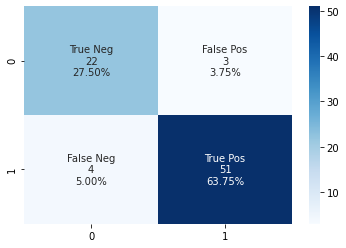

In [49]:
y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

# Decision Tree Hyper parameter tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)
final_dt

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 
print("Best estimator is {}".format(dt_model.best_estimator_))

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 32, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'gini', 'class_weight': {0: 1, 1: 3}}
Best score is 0.9948709518329771
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=10,
                       max_features=0.8, max_leaf_nodes=32,
                       min_samples_split=20)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        55

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of Decision Tree is : 0.9875
Computation time 0.58 - Sec


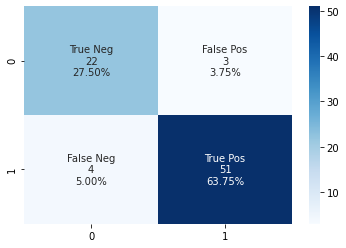

In [51]:
y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

# Random Forest Hyper parameter tuning

In [52]:
# Parameters for Random Foresthypertuning
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)
final_rf

# Print the tuned parameters and score 
print("Tuned Random Tree Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 
print("Best estimator is {}".format(rf_model.best_estimator_))

Tuned Random Tree Parameters: {'n_estimators': 60, 'min_weight_fraction_leaf': 0.30000000000000004, 'min_samples_split': 147, 'min_samples_leaf': 41, 'max_leaf_nodes': 32, 'max_depth': 5}
Best score is 0.9869446343130553
Best estimator is RandomForestClassifier(max_depth=5, max_leaf_nodes=32, min_samples_leaf=41,
                       min_samples_split=147,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=60)


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.93      0.96        55

    accuracy                           0.95        80
   macro avg       0.93      0.96      0.94        80
weighted avg       0.96      0.95      0.95        80

Accuracy of Random Forests model is : 0.95
Computation time 21.777 - Sec


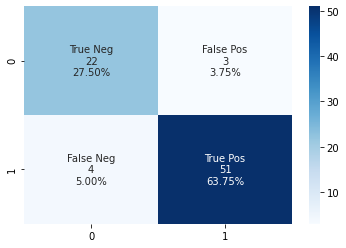

In [53]:
y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forests model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

# Support Vector Machine Hyper parameter tuning

In [54]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.67      0.72      0.69        25
           1       0.87      0.84      0.85        55

    accuracy                           0.80        80
   macro avg       0.77      0.78      0.77        80
weighted avg       0.81      0.80      0.80        80

Accuracy of Support Vector Machine is : 0.8
Computation time 1.542 - Sec


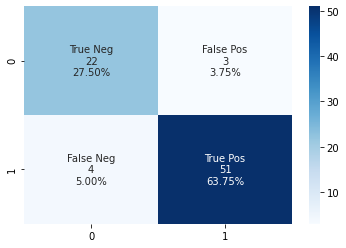

In [55]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

# Artificial neural network

In [56]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = { 
              'max_iter': [1000]
} 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.875, total=   0.2s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.562, total=   0.1s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.938, total=   0.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.906, total=   0.2s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=0.719, total=   0.2s
Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.8
Best estimator is MLPClassifier(max_iter=1000)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


              precision    recall  f1-score   support

           0       1.00      0.24      0.39        25
           1       0.74      1.00      0.85        55

    accuracy                           0.76        80
   macro avg       0.87      0.62      0.62        80
weighted avg       0.82      0.76      0.71        80

Accuracy of Artificial neural network  is : 0.7625
Computation time 1.169 - Sec


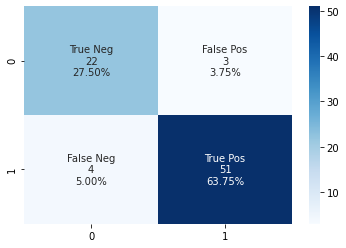

In [57]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

In [58]:
accuracies1 = [accuracy_lr,accuracy_dt,accuracy_rf, accuracy_svm, accuracy_mlp]
final_time1 = [final_lr,final_dt,final_rf, final_svm, final_mlp]
print(accuracies1)
print(final_time1)

[0.9125, 0.9875, 0.95, 0.8, 0.7625]
[3.521, 0.58, 21.777, 1.542, 1.169]


In [59]:
final_time1 = [final_lr,final_dt,final_rf, final_svm, final_mlp]
final_time1

[3.521, 0.58, 21.777, 1.542, 1.169]

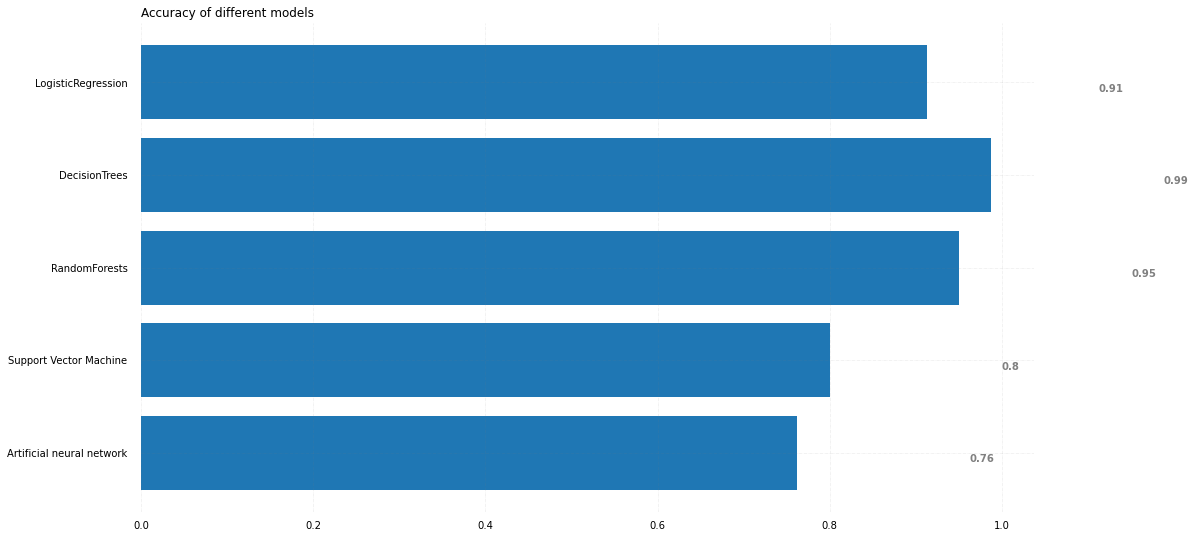

In [60]:
models= ['LogisticRegression', 'DecisionTrees', 'RandomForests', 'Support Vector Machine', 'Artificial neural network']

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(models, accuracies1) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 

## StandardScaler data with PCA implementation

In [61]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 


# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.31892736, 0.07843633])

Logistic Regression

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 1.0
Best estimator is LogisticRegression(C=19306.977288832535)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Logistic Regression is : 1.0
Computation time 0.521 - Sec


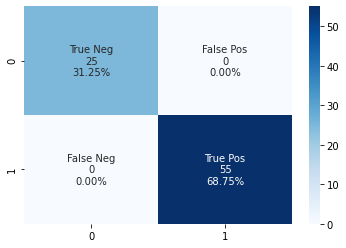

In [62]:
from sklearn.linear_model import LogisticRegression 

c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 

start_lr = time.time()
lr = GridSearchCV(LogisticRegression(), 
                  param_grid, 
                  cv = 5) 
lr.fit(X_train, y_train) 
end_lr = time.time()
final_lr = end_lr - start_lr
final_lr = round(final_lr,3)
final_lr

# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr.best_params_)) 
print("Best score is {}".format(lr.best_score_))
print("Best estimator is {}".format(lr.best_estimator_))


y_pred_lr = lr.predict(X_test)
display_confusion_matrix(y_test, y_pred_lr)
accuracy_lr=accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression is :", accuracy_lr)
print("Computation time {} - Sec".format(final_lr))

Decision Tree

Tuned Decision Tree Parameters: {'min_samples_split': 20, 'max_leaf_nodes': 8, 'max_features': 0.8, 'max_depth': 12, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 1}}
Best score is 1.0
Best estimator is DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=12, max_features=0.8, max_leaf_nodes=8,
                       min_samples_split=20)
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      1.00      0.99        55

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of Decision Tree is : 0.9875
Computation time 0.259 - Sec


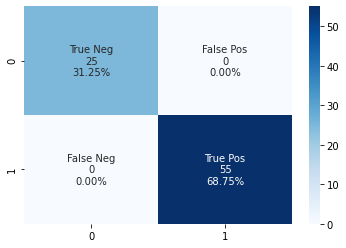

In [63]:
from sklearn.model_selection import RandomizedSearchCV
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

start_dt = time.time()
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

dt_model = clf.fit(X_train, y_train)
end_dt = time.time()
final_dt = end_dt - start_dt
final_dt = round(final_dt,3)
final_dt

# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_model.best_params_)) 
print("Best score is {}".format(dt_model.best_score_)) 
print("Best estimator is {}".format(dt_model.best_estimator_))

y_pred_dt = dt_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_dt)
accuracy_dt=accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree is :", accuracy_dt)
print("Computation time {} - Sec".format(final_dt))

Random Forest

In [64]:
# Parameters for Random Foresthypertuning
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

start_rf = time.time()
rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_grid,
                         scoring='f1',
                         random_state=4658,
                         n_iter=20)

rf_model = rf.fit(X_train, y_train)
end_rf = time.time()
final_rf = end_rf - start_rf
final_rf = round(final_rf,3)
final_rf

# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(rf_model.best_params_)) 
print("Best score is {}".format(rf_model.best_score_)) 
print("Best estimator is {}".format(rf_model.best_estimator_))

Tuned Random Forest Parameters: {'n_estimators': 236, 'min_weight_fraction_leaf': 0.2, 'min_samples_split': 78, 'min_samples_leaf': 28, 'max_leaf_nodes': 40, 'max_depth': 20}
Best score is 1.0
Best estimator is RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_leaf=28,
                       min_samples_split=78, min_weight_fraction_leaf=0.2,
                       n_estimators=236)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      1.00      0.99        55

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Accuracy of Random Forest model is : 0.9875
Computation time 21.951 - Sec


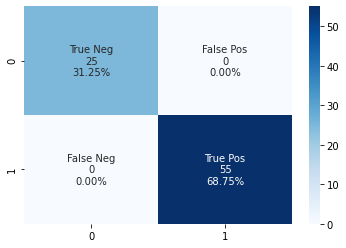

In [65]:
y_pred_rf = rf_model.predict(X_test)
display_confusion_matrix(y_test, y_pred_rf)
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest model is :", accuracy_rf)
print("Computation time {} - Sec".format(final_rf))

Support Vector Machine

In [66]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

start_svm = time.time()
svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
svm.fit(X_train, y_train)

end_svm = time.time()
final_svm = end_svm - start_svm
final_svm = round(final_svm,3)
final_svm

# Print the tuned parameters and score 
print("Tuned Support Vector Machine Parameters: {}".format(svm.best_params_)) 
print("Best score is {}".format(svm.best_score_))
print("Best estimator is {}".format(svm.best_estimator_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.953, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.984, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.984, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.984, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.938, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Support Vector Machine is : 1.0
Computation time 0.371 - Sec


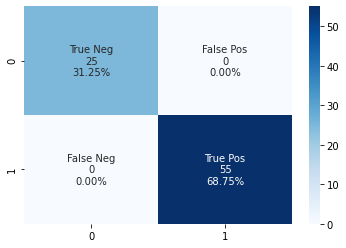

In [67]:
y_pred_svm = svm.predict(X_test)
display_confusion_matrix(y_test, y_pred_svm)
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy of Support Vector Machine is :", accuracy_svm)
print("Computation time {} - Sec".format(final_svm))

Artificial neural network

In [68]:
from sklearn.neural_network import MLPClassifier

# defining parameter range
param_grid = { 
              'max_iter': [1000]
} 

start_mlp = time.time()
mlp = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
mlp.fit(X_train, y_train.values.ravel())

end_mlp = time.time()
final_mlp = end_mlp - start_mlp
final_mlp = round(final_mlp,3)
final_mlp

# Print the tuned parameters and score 
print("Tuned Artificial neural network Parameters: {}".format(mlp.best_params_)) 
print("Best score is {}".format(mlp.best_score_))
print("Best estimator is {}".format(mlp.best_estimator_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=1.000, total=   0.5s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....................... max_iter=1000, score=1.000, total=   0.5s
[CV] max_iter=1000 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... max_iter=1000, score=0.984, total=   0.5s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=1.000, total=   0.5s
[CV] max_iter=1000 ...................................................
[CV] ....................... max_iter=1000, score=1.000, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


Tuned Artificial neural network Parameters: {'max_iter': 1000}
Best score is 0.996875
Best estimator is MLPClassifier(max_iter=1000)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        55

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy of Artificial neural network  is : 1.0
Computation time 2.925 - Sec


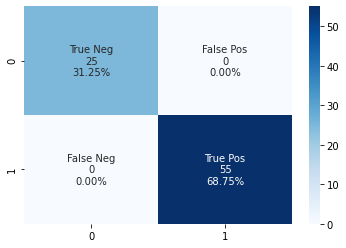

In [69]:
y_pred_mlp = mlp.predict(X_test)
display_confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp=accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Artificial neural network  is :", accuracy_mlp)
print("Computation time {} - Sec".format(final_mlp))

In [70]:
accuracies2 = [accuracy_lr,accuracy_dt,accuracy_rf, accuracy_svm, accuracy_mlp]
final_time2 = [final_lr,final_dt,final_rf, final_svm, final_mlp]
print(accuracies2)
print(final_time2)

[1.0, 0.9875, 0.9875, 1.0, 1.0]
[0.521, 0.259, 21.951, 0.371, 2.925]


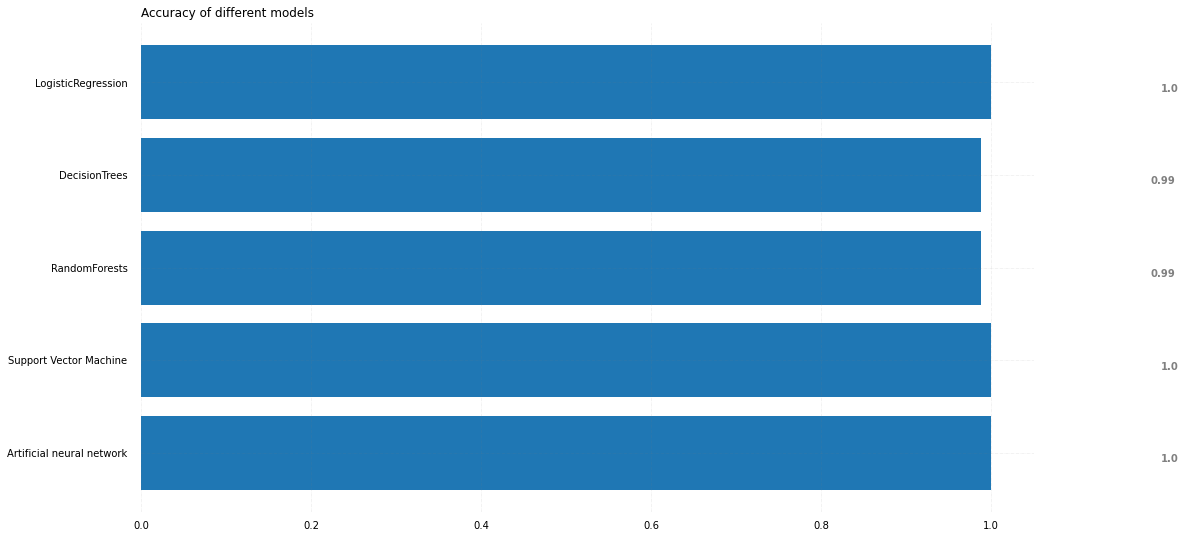

In [71]:
models= ['LogisticRegression', 'DecisionTrees', 'RandomForests', 'Support Vector Machine', 'Artificial neural network']

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
# Horizontal Bar Plot 
ax.barh(models, accuracies2) 

# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

# Show top values 
ax.invert_yaxis() 

# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
            str(round((i.get_width()), 2)), 
            fontsize = 10, fontweight ='bold', 
            color ='grey') 
ax.set_title('Accuracy of different models', loc ='left') 
plt.show() 